In [7]:
from helpers import classifiers
from helpers.custom_class import *
import matplotlib.pyplot  as plt
from helpers.custom_class import ClassesTracker
from test_file import graphs3d, graphs2d
%matplotlib notebook

In [2]:
np.random.seed(0)
CT = ClassesTracker()

Watching  4 dims
Pre processing of all the data finished in  0:00:21.468773


Watching  4 dims
Pre processing of all the data finished in  0:00:20.748286
We will print 6 graphs


<IPython.core.display.Javascript object>


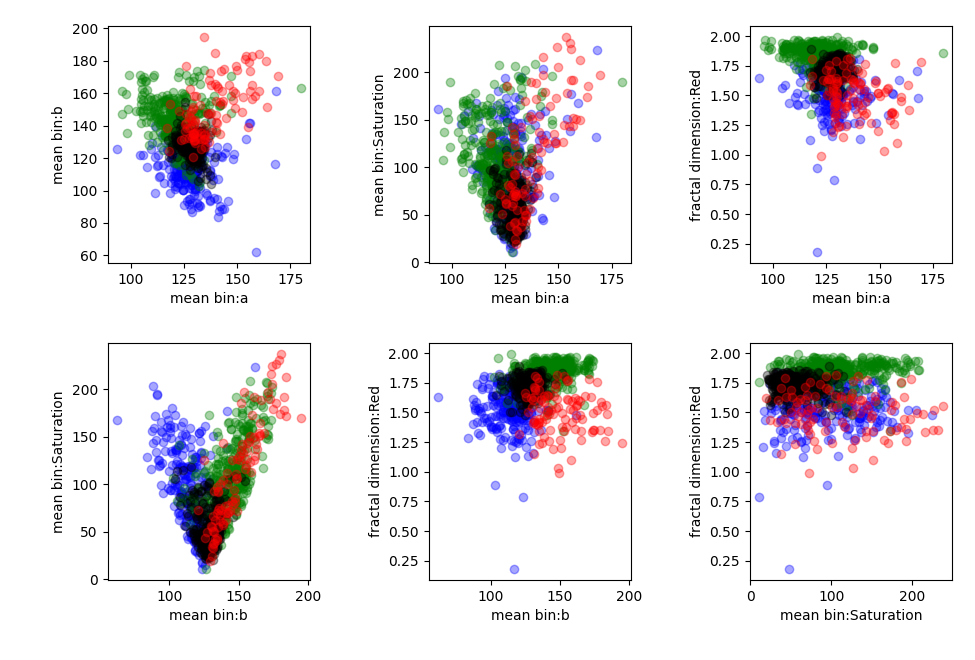

In [9]:
graphs2d()